<a href="https://colab.research.google.com/github/urabayen01/Actividad-1/blob/main/A1_BCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de Regresión lineal simple con Dataset de Airbnb Ciudad de México

In [1]:
#importar Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan as NaN

In [4]:
#Leer datos

df=pd.read_csv('listings_BCN.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,673276379194656210,https://www.airbnb.com/rooms/673276379194656210,20220910194401,2022-09-10,city scrape,Habitación muy acogedora.,Abrace la simplicidad en este lugar tranquilo ...,El barrio es tranquilo y bien hubicado. Cerc...,https://a0.muscache.com/pictures/miso/Hosting-...,51421682,...,4.89,4.89,4.78,Exempt,t,1,0,1,0,9.00
1,44192271,https://www.airbnb.com/rooms/44192271,20220910194401,2022-09-10,city scrape,Cozy terrace apartment Apartamento con patio,A private terraced + 2 bedroom ground floor ap...,The neighbourhood is quiet with trees. Though ...,https://a0.muscache.com/pictures/2e579e6b-b717...,200754964,...,4.98,4.52,4.65,HUTB-013294,f,1,1,0,0,2.45
2,17039441,https://www.airbnb.com/rooms/17039441,20220910194401,2022-09-10,city scrape,Apart. full equipped. 2 min to Subway lines L1...,Precioso apartamento ideal para parejas. Lumin...,La zona dispone de servicios básicos y una exc...,https://a0.muscache.com/pictures/02af8b09-c8ca...,114340651,...,4.99,4.70,4.89,NaN,f,1,1,0,0,2.15
3,18674,https://www.airbnb.com/rooms/18674,20220910194401,2022-09-11,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.79,4.79,4.34,HUTB-002062,t,38,38,0,0,0.27
4,553559871868002337,https://www.airbnb.com/rooms/553559871868002337,20220910194401,2022-09-10,city scrape,"8 lacus, VICTORIA",8 apartaments que pretenen recordar la importà...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,442972056,...,4.50,4.40,4.80,HUTB-009880,t,8,8,0,0,1.52


In [5]:
#Solo tomamos las columnas de interés

df=df[['number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness','review_scores_communication', 'room_type']]
df.head()


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,9,100%,$59.00,351,4.89,5.00,4.89,Private room
1,54,100%,$110.00,151,4.83,4.70,4.98,Entire home/apt
2,145,97%,$86.00,218,4.94,4.94,4.99,Entire home/apt
3,30,93%,$180.00,60,4.38,4.72,4.79,Entire home/apt
4,10,100%,$110.00,106,4.70,4.90,4.50,Entire home/apt


#PUNTO 3

In [6]:
#Quitamos % y $ en las columnas correspondiente
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


number_of_reviews                int64
host_acceptance_rate            object
price                           object
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

In [7]:
print(df.shape) #Número de filas y columnas
Duplicadas=df.duplicated()  #Crea una serie 
print("\nNúmero de filas duplicadas:", Duplicadas[Duplicadas==True].count()) 

(16920, 8)

Número de filas duplicadas: 996


In [8]:
#Limpieza de filas repetidas
df.drop_duplicates(keep='first', inplace=True)
df.shape

(15924, 8)

In [9]:
#Identificar nulos
df.isnull().sum()

number_of_reviews                 0
host_acceptance_rate           1762
price                             0
availability_365                  0
review_scores_rating           2809
review_scores_cleanliness      2880
review_scores_communication    2879
room_type                         0
dtype: int64

In [10]:
df =df.fillna(method="bfill") 
df =df.fillna(method="ffill") 
df.isnull().sum()

number_of_reviews              0
host_acceptance_rate           0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
room_type                      0
dtype: int64

In [11]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype('int64')
df["price"] = df["price"].astype('float64')
df.dtypes

number_of_reviews                int64
host_acceptance_rate             int64
price                          float64
availability_365                 int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
room_type                       object
dtype: object

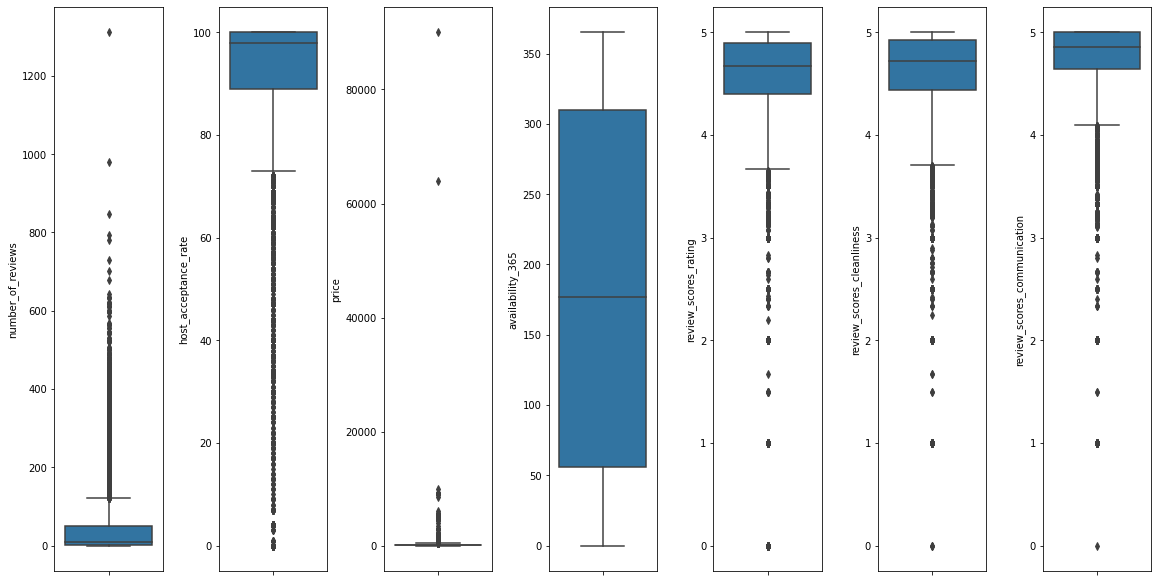

In [12]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

In [13]:
y=df

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido number_of_reviews              121.000
host_acceptance_rate           116.500
price                          405.000
availability_365               691.000
review_scores_rating             5.650
review_scores_cleanliness        5.665
review_scores_communication      5.540
dtype: float64
Limite inferior permitido number_of_reviews              -71.000
host_acceptance_rate            72.500
price                         -155.000
availability_365              -325.000
review_scores_rating             3.650
review_scores_cleanliness        3.705
review_scores_communication      4.100
dtype: float64


In [14]:
df=df[df['number_of_reviews']<121.000]
df=df[df['host_acceptance_rate']>72.500]
df=df[df['price']<405.000]
df=df[df['review_scores_rating']>3.605]
df=df[df['review_scores_cleanliness']>3.705]
df=df[df['review_scores_communication']>4.100]
df.head()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,9,100,59.0,351,4.89,5.00,4.89,Private room
1,54,100,110.0,151,4.83,4.70,4.98,Entire home/apt
3,30,93,180.0,60,4.38,4.72,4.79,Entire home/apt
4,10,100,110.0,106,4.70,4.90,4.50,Entire home/apt
5,0,84,71.0,269,4.73,4.88,4.98,Entire home/apt


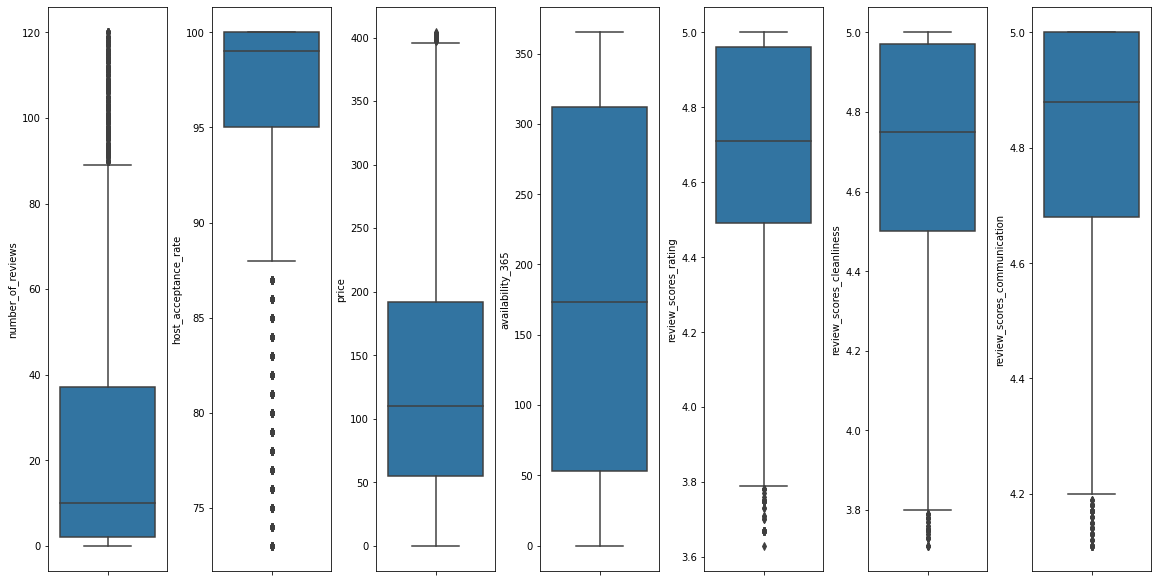

In [15]:
fig, axs = plt.subplots(ncols=7, figsize=(16,8))
index=0
axs=axs.flatten()
copiadf=df.copy()
copiadf=copiadf.drop('room_type', axis=1)
for k, v in copiadf.items(): # k variable, v valores
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4)

#PUNTO 4

In [16]:
#División en 3 DataFrames

Home=df[df['room_type']=='Entire home/apt']
Room=df[df['room_type']=='Private room']
Shared=df[df['room_type']=='Shared room']
Hotel=df[df['room_type']=='Hotel room']
print(Home.shape)
print(Room.shape)
print(Shared.shape)
print(Hotel.shape)

(6093, 8)
(3589, 8)
(109, 8)
(116, 8)


In [17]:
def correlaciones(i):
  print('number_of_reviews vs host_acceptance_rate: ',abs(i['number_of_reviews'].corr(i['host_acceptance_rate'])))
  print('number_of_reviews  vs review_scores_rating: ',abs(i['number_of_reviews'].corr(i['review_scores_rating'])))
  print('number_of_reviews  vs price: ',abs(i['number_of_reviews'].corr(i['price'])))
  print('number_of_reviews  vs review_scores_cleanliness: ',abs(i['number_of_reviews'].corr(i['review_scores_cleanliness'])))
  print('number_of_reviews  vs availability_365: ',abs(i['number_of_reviews'].corr(i['availability_365'])))
  print('number_of_reviews  vs review_scores_communication: ',abs(i['number_of_reviews'].corr(i['review_scores_communication'])))

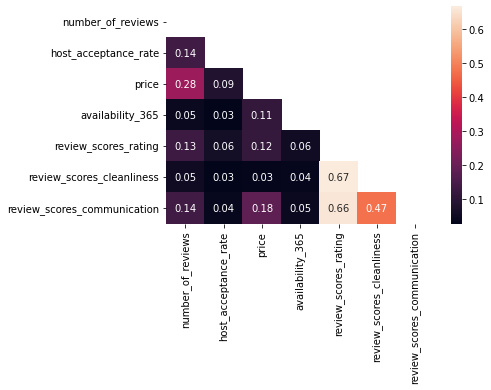

In [18]:
#Mapa de correlaciones
Corr_Factors=Home.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True,mask=mask, fmt='.2f')
Heat_Map

In [19]:
correlaciones(Home)

number_of_reviews vs host_acceptance_rate:  0.13710557833119638
number_of_reviews  vs review_scores_rating:  0.12832830735600964
number_of_reviews  vs price:  0.27572259336342964
number_of_reviews  vs review_scores_cleanliness:  0.05366820349665364
number_of_reviews  vs availability_365:  0.04784738517088788
number_of_reviews  vs review_scores_communication:  0.1374003376856906


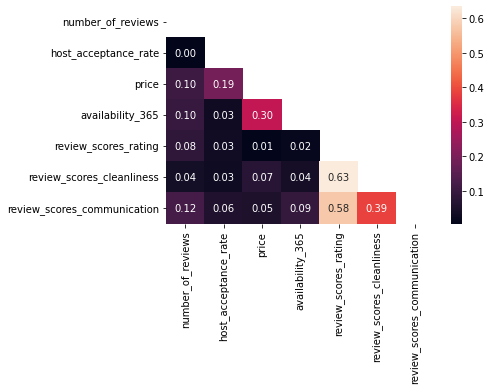

In [20]:
#Mapa de correlaciones
Corr_Factors=Room.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True, mask=mask, fmt='.2f')
Heat_Map

In [21]:
correlaciones(Room)

number_of_reviews vs host_acceptance_rate:  0.003973107881781965
number_of_reviews  vs review_scores_rating:  0.08093414247555429
number_of_reviews  vs price:  0.10398596809296198
number_of_reviews  vs review_scores_cleanliness:  0.037339360458459425
number_of_reviews  vs availability_365:  0.09576636110420295
number_of_reviews  vs review_scores_communication:  0.1187714909587272


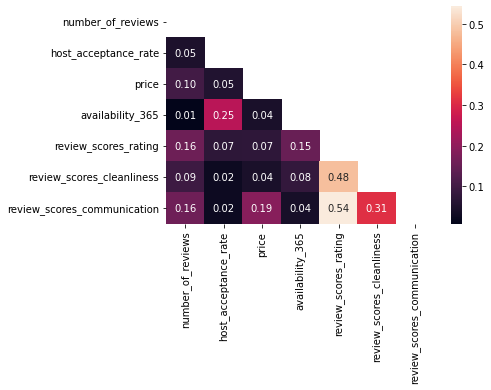

In [22]:
#Mapa de correlaciones
Corr_Factors=Shared.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True, mask=mask,fmt='.2f')
Heat_Map

In [23]:
correlaciones(Shared)

number_of_reviews vs host_acceptance_rate:  0.047385775342589725
number_of_reviews  vs review_scores_rating:  0.15793237240214625
number_of_reviews  vs price:  0.09974121818280315
number_of_reviews  vs review_scores_cleanliness:  0.09449950743711462
number_of_reviews  vs availability_365:  0.007370907620454065
number_of_reviews  vs review_scores_communication:  0.15915077507274838


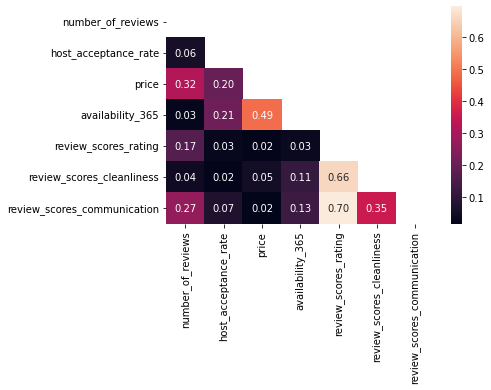

In [24]:
#Mapa de correlaciones
Corr_Factors=Hotel.corr()
Corr_Factors_abs= abs(Corr_Factors)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
Heat_Map=sns.heatmap(Corr_Factors_abs, annot=True, mask=mask,fmt='.2f')
Heat_Map

In [25]:
correlaciones(Hotel)

number_of_reviews vs host_acceptance_rate:  0.058094593018926326
number_of_reviews  vs review_scores_rating:  0.1656101750082596
number_of_reviews  vs price:  0.31560632862029453
number_of_reviews  vs review_scores_cleanliness:  0.04409387988002524
number_of_reviews  vs availability_365:  0.0256207821220384
number_of_reviews  vs review_scores_communication:  0.2678139300399419


#PUNTO 5

HOME

In [28]:
Home.columns

Index(['number_of_reviews', 'host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication', 'room_type'],
      dtype='object')

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [30]:
Var_Dep=Home['number_of_reviews']
Var_Indep=Home[['host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication']]

In [31]:
model.fit(X=Var_Indep, y=Var_Dep)
model.__dict__
model.score(X=Var_Indep,y=Var_Dep)

0.09940971617904604

PRIVATE ROOM

In [32]:
modelP=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [33]:
PVar_Dep=Room['number_of_reviews']
PVar_Indep=Room[['host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication']]

In [34]:
modelP.fit(X=PVar_Indep, y=PVar_Dep)
modelP.__dict__
modelP.score(X=PVar_Indep,y=PVar_Dep)

0.03353723327044611

SHARED ROOM

In [35]:
modelS=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [36]:
SVar_Dep=Shared['number_of_reviews']
SVar_Indep=Shared[['host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication']]

In [37]:
modelS.fit(X=SVar_Indep, y=SVar_Dep)
modelS.__dict__
modelS.score(X=SVar_Indep,y=SVar_Dep)

0.0396105533636133

HOTEL ROOM

In [38]:
modelH=LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [39]:
HVar_Dep=Hotel['number_of_reviews']
HVar_Indep=Hotel[['host_acceptance_rate', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_communication']]

In [40]:
modelH.fit(X=HVar_Indep, y=HVar_Dep)
modelH.__dict__
modelH.score(X=HVar_Indep,y=HVar_Dep)

0.1995223371459316

#PUNTO 6

In [41]:
#Home
coef_Deter=model.score(X=Var_Indep,y=Var_Dep)
coef_Deter

0.09940971617904604

In [42]:
#Home
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.31529306395644996

In [43]:
#Private Room
coef_DeterP=modelP.score(X=PVar_Indep,y=PVar_Dep)
coef_DeterP

0.03353723327044611

In [44]:
#Private Room
coef_Correlp=np.sqrt(coef_DeterP)
coef_Correlp

0.1831317374745462

In [45]:
#Shared Room
coef_Deters=modelS.score(X=SVar_Indep,y=SVar_Dep)
coef_Deters

0.0396105533636133

In [46]:
#Shared Room
coef_Correls=np.sqrt(coef_Deters)
coef_Correls

0.19902400197868925

In [47]:
#Hotel Room
coef_Deterh=modelH.score(X=HVar_Indep,y=HVar_Dep)
coef_Deterh

0.1995223371459316

In [48]:
#Hotel Room
coef_Correlh=np.sqrt(coef_Deterh)
coef_Correlh

0.4466792329467888

In [49]:
Tabla = pd.DataFrame()

In [50]:
Tabla['Tipo de habitacion'] = ['Entire room/apt', 'Private room', 'Shared room', 'Hotel room']
Tabla['Coef_det']=[coef_Deter,coef_DeterP,coef_Deters,coef_Deterh]
Tabla['Coef_Correl']=[coef_Correl,coef_Correlp,coef_Correls,coef_Correlh]

In [51]:
print(Tabla)

  Tipo de habitacion  Coef_det  Coef_Correl
0    Entire room/apt  0.099410     0.315293
1       Private room  0.033537     0.183132
2        Shared room  0.039611     0.199024
3         Hotel room  0.199522     0.446679
